In [1]:

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt




In [3]:
# Load the transmitted sequences from the 'rxGridSSBurstIdeal.mat' file
transmitted_file_path = "F:\\Projekty\\5g_OPEN_RAN\\rxGridSSBurstIdeal.mat"
transmitted_data = sio.loadmat(transmitted_file_path)
transmitted_sequences = transmitted_data['rxGridSSBurst']

# Load the received pairs from the 'meas_21_05_2024_1799_cellID_466_pbchSymbols.mat.npy' file
received_file_path = "F:\\Projekty\\5g_OPEN_RAN\\Data_long_term\\Data_selection\\comeretial\\meas_21_05_2024_1799_cellID_466_pbchSymbols.mat.npy"
received_pairs = np.load(received_file_path)

# Check the shapes of the loaded data to ensure alignment
transmitted_sequences_shape = transmitted_sequences.shape
received_pairs_shape = received_pairs.shape

transmitted_sequences_shape, received_pairs_shape

((72, 16), (72, 48))

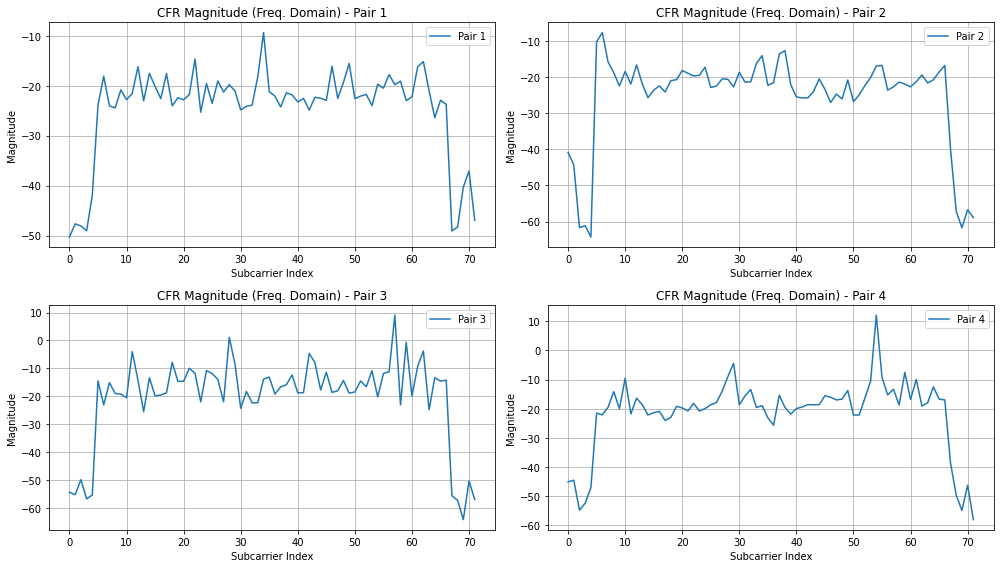

In [6]:
# Align the first 16 subcarriers/symbols of the received sequences with the transmitted sequences
aligned_received_sequences = received_pairs[:, :16]

# Estimate the CFR by dividing the received frequency-domain sequences by the transmitted frequency-domain sequences
cfr_estimated_freq_domain = aligned_received_sequences / transmitted_sequences

# Visualize the estimated CFR for the first 4 pairs
plt.figure(figsize=(14, 8))

for i in range(4):  # Plot CFR for the first 4 pairs
    plt.subplot(2, 2, i+1)
    data = -20 * np.log10(np.abs(cfr_estimated_freq_domain[:, i]))
    plt.plot(data, label=f'Pair {i+1}')
    plt.title(f'CFR Magnitude (Freq. Domain) - Pair {i+1}')
    plt.xlabel('Subcarrier Index')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()